In [144]:
!pip install pandas-profiling==2.7.1
!pip install pandas==0.25.0

     |████████████████████████████████| 256kB 3.3MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.3MB/s 
     |████████████████████████████████| 71kB 5.0MB/s 
     |████████████████████████████████| 10.1MB 12.3MB/s 
     |████████████████████████████████| 604kB 46.3MB/s 
     |████████████████████████████████| 3.1MB 45.4MB/s 
     |████████████████████████████████| 296kB 40.6MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=b6046390c126d21c4848a1c74dd1f3f5a0cba28afb9b8e1b700c246e0caff165
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha256=bdcb7b9e5475ba7a4280a93c83444c70925f501b96c2524c2e721eb894f38a2b
  Stored in directory: /root/.cache/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built htmlmin im

  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: visions 0.4.1 has requirement pandas>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: pandas-profiling 2.7.1 has requirement pandas!=1.0.0,!=1.0.1,!=1.0.2,>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5


In [2]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns #untuk visualisasi data
import matplotlib.pyplot as plt #untuk visualisasi data
import statsmodels.api as sm
import umap.umap_ as umap
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition  import TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA
from statsmodels.formula.api import ols
from sklearn.cluster import KMeans
%matplotlib inline
sns.set(color_codes=True)

In [3]:
pd.__version__

'0.25.0'

In [4]:
data=pd.read_csv('bandara.csv')

In [5]:
data.isnull().any()

Soekarno-Hatta    False
Hasanudin         False
Kualanamu         False
Juanda            False
dtype: bool

In [6]:
data.dtypes

Soekarno-Hatta    int64
Hasanudin         int64
Kualanamu         int64
Juanda            int64
dtype: object

In [7]:
data.describe()

,Soekarno-Hatta,Hasanudin,Kualanamu,Juanda
count,83.000000,83.000000,83.00000,83.000000
mean,17278.674699,2380.409639,1486.26506,3891.421687
std,2704.825936,553.688541,383.18069,647.679538
min,8116.000000,1355.000000,926.00000,2038.000000
25%,15897.500000,1912.000000,1225.50000,3479.500000
50%,17969.000000,2276.000000,1439.00000,3825.000000
75%,19132.500000,2890.000000,1645.00000,4258.000000
max,22628.000000,3571.000000,3412.00000,5523.000000


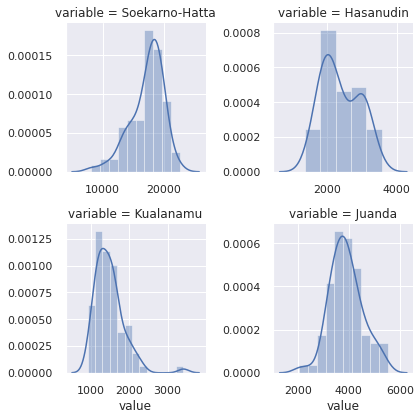

In [8]:
f = pd.melt(data, value_vars= data)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [9]:
pandas_profiling.ProfileReport(data)

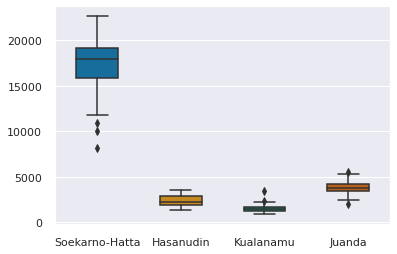

In [10]:
sns.boxplot(data=data, palette='colorblind',width=.5)

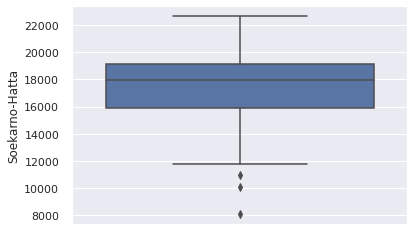

In [11]:
sns.boxplot(y=data['Soekarno-Hatta'])

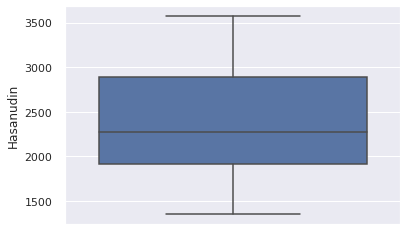

In [12]:
sns.boxplot(y=data['Hasanudin'])

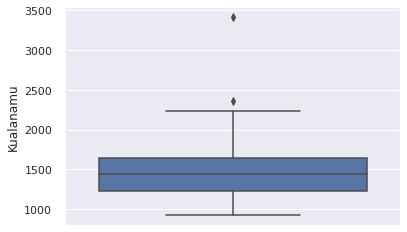

In [13]:
sns.boxplot(y=data['Kualanamu'])

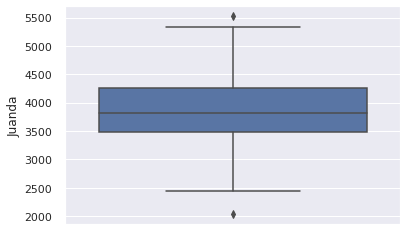

In [14]:
sns.boxplot(y=data['Juanda'])

In [15]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Soekarno-Hatta'],data['Hasanudin'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 2416.814172079083
PR(>F): 4.582249891908914e-100


In [16]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Soekarno-Hatta'],data['Kualanamu'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 2773.745710990968
PR(>F): 1.112260212239305e-104


In [17]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Soekarno-Hatta'],data['Juanda'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 1922.9526712530649
PR(>F): 1.6926516882453942e-92


In [18]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Hasanudin'],data['Kualanamu'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 146.3570219775012
PR(>F): 1.7327745741081415e-24


In [19]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Hasanudin'],data['Juanda'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 261.0006353576934
PR(>F): 9.712953339692188e-36


In [20]:
from scipy.stats import stats

fp, pv = stats.f_oneway(data['Kualanamu'],data['Juanda'])

print(f'F: {fp}\nPR(>F): {pv}')

F: 847.8242124414761
PR(>F): 1.0723365218616387e-66


In [21]:
a=data.values

In [22]:
a.shape

(83, 4)

In [23]:
svd = TruncatedSVD(random_state=42).fit_transform(a)

In [24]:
ICA = FastICA(n_components=2, random_state=42) 
pca=ICA.fit_transform(a)

In [25]:
umap_data = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=62).fit_transform(a)

In [26]:
tsne = TSNE(n_iter=30000, verbose=1,random_state=42 ).fit_transform(a)

[t-SNE] Computing 82 nearest neighbors...
[t-SNE] Indexed 83 samples in 0.000s...
[t-SNE] Computed neighbors for 83 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 83 / 83
[t-SNE] Mean sigma: 1217.397172
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.754551
[t-SNE] KL divergence after 1550 iterations: 0.097631


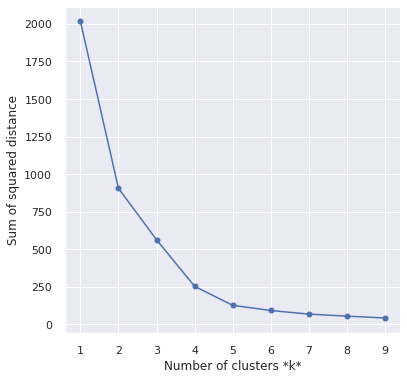

In [27]:
sse=[]
for k in range(1,10):
    k = KMeans(n_clusters=k, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')
    k.fit(umap_data)
    sse.append(k.inertia_)
plt.figure(figsize=(6, 6))
plt.plot(list(range(1,10)), sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');
plt.show()

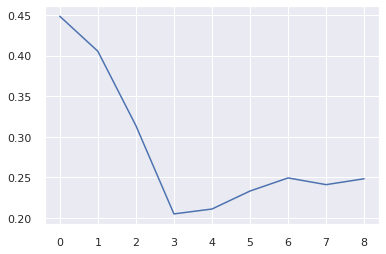

In [28]:
s = []
for k in range(2,11): 
    k= KMeans(n_clusters=k, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')
    k.fit(umap_data)
    s.append(silhouette_score(a, k.labels_, metric='euclidean'))
plt.plot(s)

In [29]:
k = KMeans(n_clusters=4, init='k-means++',n_init=10, max_iter=9999, tol=.0001,\
          verbose=0,random_state=42, copy_x=True, n_jobs=4, precompute_distances='auto' ,algorithm='auto')

In [30]:
k_ = k.fit_predict(umap_data)

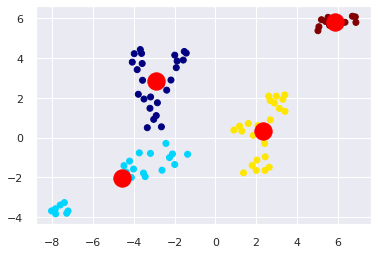

In [31]:
plt.scatter(umap_data[:,0],umap_data[:,1], c=k_, cmap='jet')
plt.scatter(k.cluster_centers_[:, 0], k.cluster_centers_[:, 1], s=300, c='red')
plt.show()